In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import ydata_profiling

In [2]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv(r"D:\Data Science Bootcamp\ML\Hotel Case Study\Hotel Reservations.csv")

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Cleaning and Preprocessing

In [ ]:
profile = ydata_profiling.ProfileReport(df)
profile.to_file("hotel_data_report.html")

In [5]:
df.shape

(36275, 19)

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
# Assuming df is your DataFrame
# Updating the list of numerical columns from df
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating IQR and identifying outliers for each numerical column
outlier_info = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    outlier_info[column] = {
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outlier_count
    }

outlier_info

{'no_of_adults': {'IQR': 0.0,
  'Lower Bound': 2.0,
  'Upper Bound': 2.0,
  'Outlier Count': 10167},
 'no_of_children': {'IQR': 0.0,
  'Lower Bound': 0.0,
  'Upper Bound': 0.0,
  'Outlier Count': 2698},
 'no_of_weekend_nights': {'IQR': 2.0,
  'Lower Bound': -3.0,
  'Upper Bound': 5.0,
  'Outlier Count': 21},
 'no_of_week_nights': {'IQR': 2.0,
  'Lower Bound': -2.0,
  'Upper Bound': 6.0,
  'Outlier Count': 324},
 'required_car_parking_space': {'IQR': 0.0,
  'Lower Bound': 0.0,
  'Upper Bound': 0.0,
  'Outlier Count': 1124},
 'lead_time': {'IQR': 109.0,
  'Lower Bound': -146.5,
  'Upper Bound': 289.5,
  'Outlier Count': 1331},
 'arrival_year': {'IQR': 0.0,
  'Lower Bound': 2018.0,
  'Upper Bound': 2018.0,
  'Outlier Count': 6514},
 'arrival_month': {'IQR': 5.0,
  'Lower Bound': -2.5,
  'Upper Bound': 17.5,
  'Outlier Count': 0},
 'arrival_date': {'IQR': 15.0,
  'Lower Bound': -14.5,
  'Upper Bound': 45.5,
  'Outlier Count': 0},
 'repeated_guest': {'IQR': 0.0,
  'Lower Bound': 0.0,
  'Upp

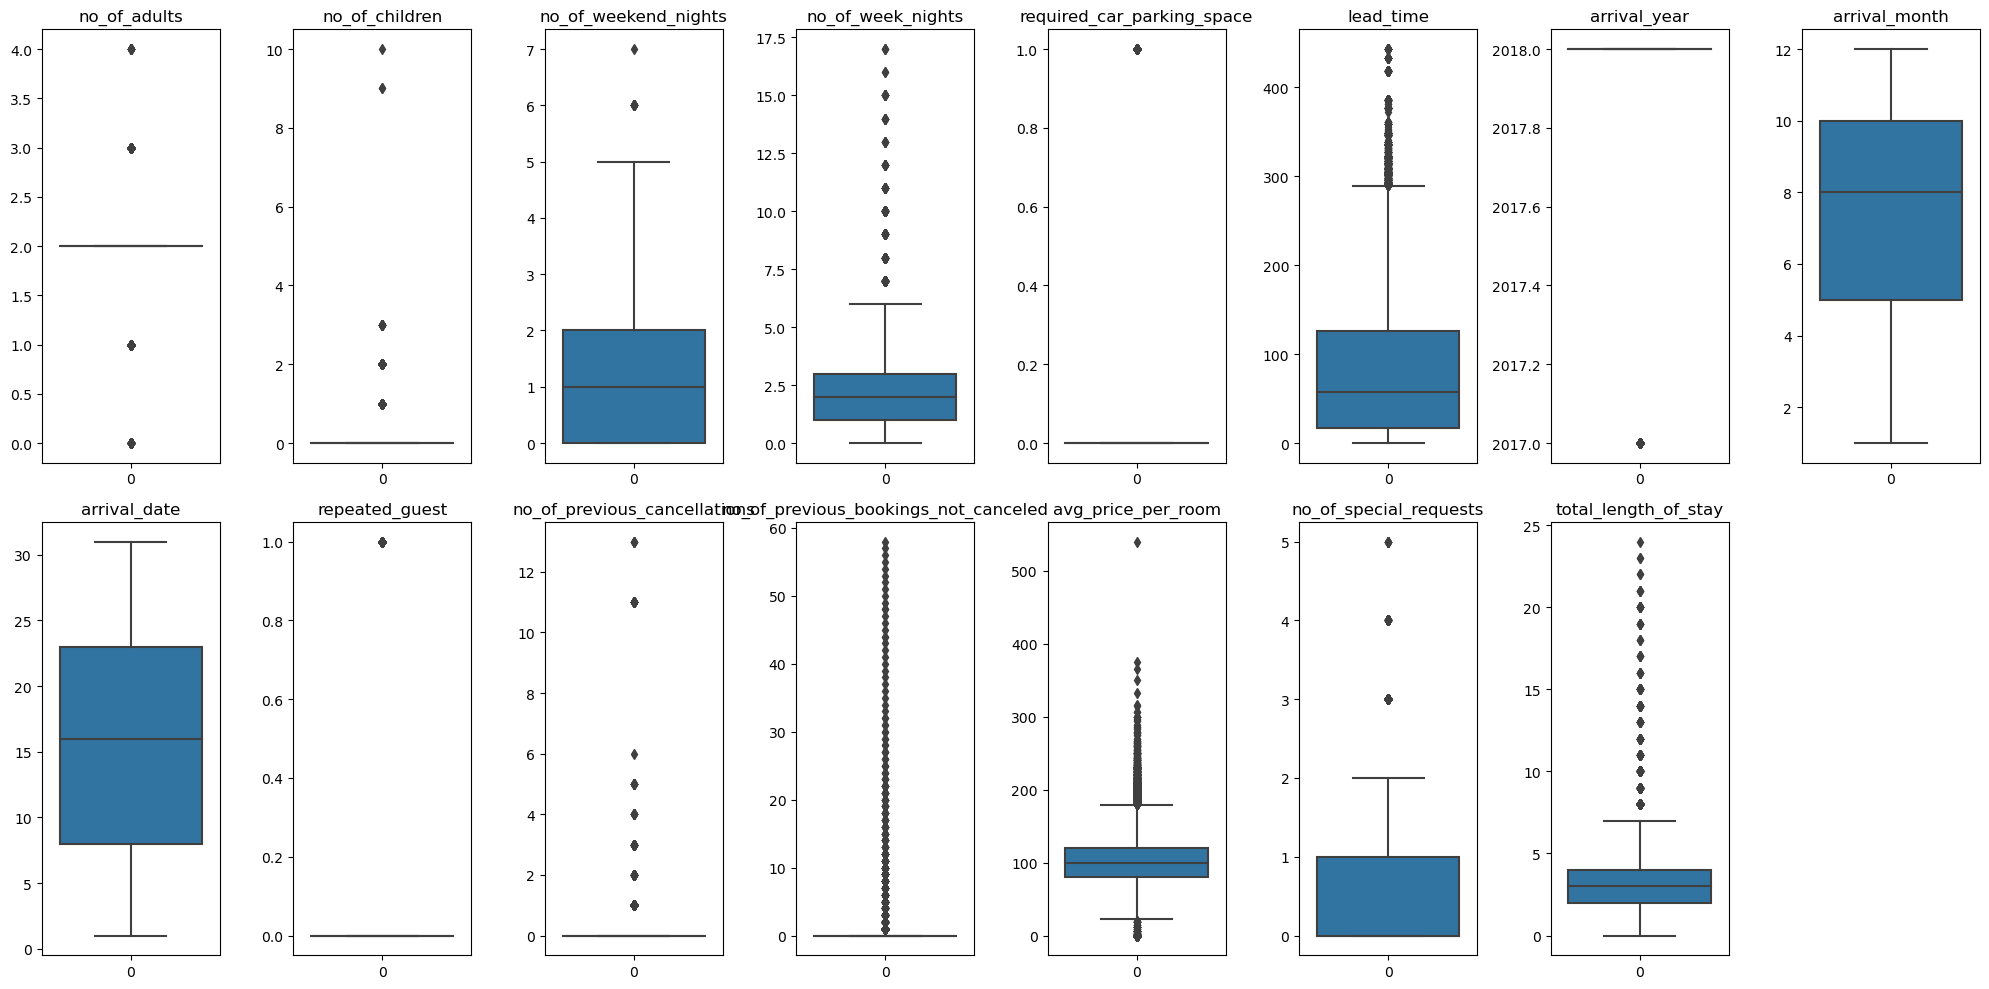

In [9]:
# Adding a calculated column 'total_length_of_stay' for the boxplot
df['total_length_of_stay'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

# Updating the numerical columns list
numerical_columns_updated = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting box plots for each updated numerical column to visualize outliers
plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns_updated, 1):
    plt.subplot(2, (len(numerical_columns_updated) + 1) // 2, i)
    sns.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## EDA

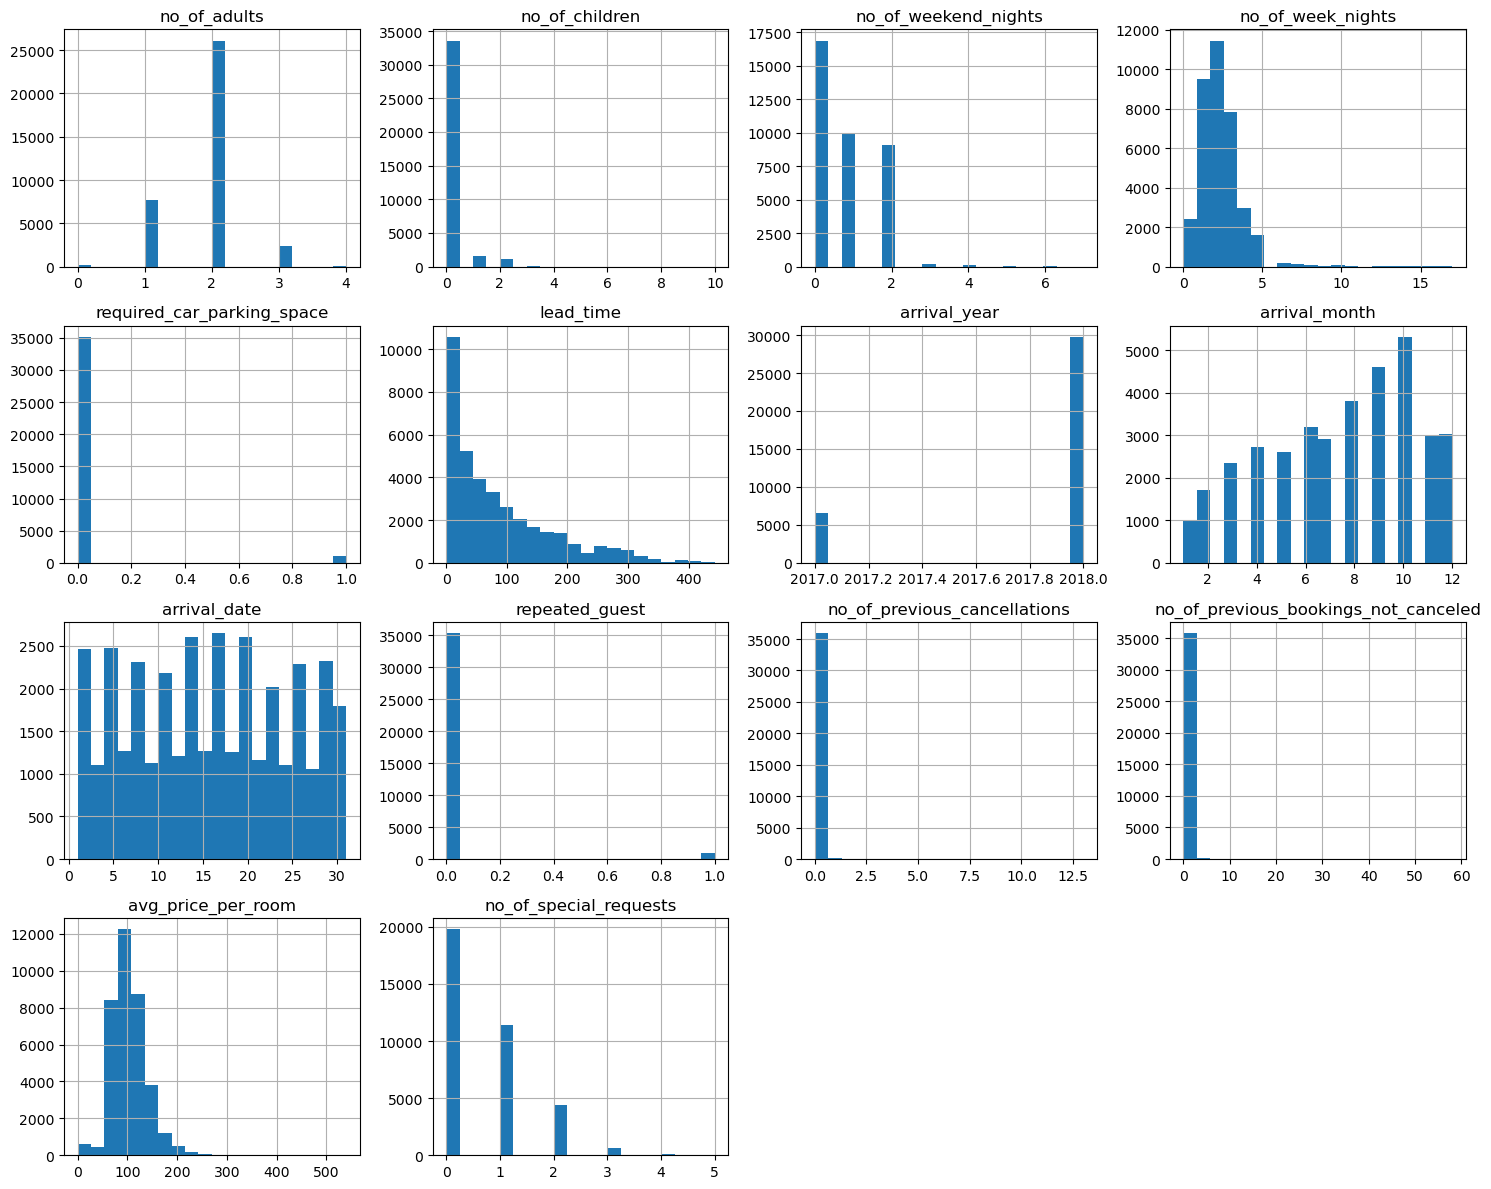

In [10]:
# Adjusting the subplot grid dimensions based on the number of numerical columns
num_columns = len(numerical_columns)
rows = (num_columns + 3) // 4  # Ensure there are enough rows to display all columns

# Plotting histograms for numerical columns
plt.figure(figsize=(15, rows * 3))  # Adjusting the figure size based on the number of rows

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, 4, i)
    df[column].hist(bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

no_of_adults: Most reservations are made for two adults, which could indicate that double occupancy is the most common booking type. Very few bookings are made for 3 or 4 adults, which are less common scenarios.

no_of_children: A vast majority of bookings involve no children, suggesting that the hotel is perhaps more popular with couples or business travelers rather than families.

no_of_weekend_nights and no_of_week_nights: Both distributions are skewed to the right, indicating that most stays are short, possibly one or two nights, typically expected for weekend getaways or short business trips.

required_car_parking_space: Nearly all bookings do not require a car parking space, which may suggest that guests either do not travel by car or parking is not a concern (perhaps due to alternative transportation options or the hotel's location).

lead_time: The lead time for bookings also shows a right-skewed distribution, with most bookings made relatively close to the arrival date. This could suggest that the hotel's clientele are more spontaneous or last-minute travelers.

arrival_year and arrival_month: These histograms illustrate the frequency of bookings across different years and months. There appears to be a relatively even distribution across months, but without knowing the specific counts or the scale of the y-axis, it's hard to draw definitive conclusions.

arrival_date: The distribution across dates of the month seems fairly even, indicating no specific trend or preference for arrival dates.

repeated_guest: This histogram shows that the hotel has a very low number of repeat guests compared to new guests, indicating that the hotel might be more of a one-time stay venue or has a low guest retention rate.

no_of_previous_cancellations and no_of_previous_bookings_not_canceled: These histograms show that most guests have not canceled their bookings previously, and very few have a history of not canceling their bookings. This could indicate a reliable booking behavior among guests.

avg_price_per_room: This histogram has a right-skewed distribution with a peak at the lower end of the price range. This suggests that the hotel's rooms are generally booked at a lower average price, which could imply affordability or a higher number of standard rooms compared to luxury suites.

no_of_special_requests: Most bookings have few or no special requests, which could imply standard service expectations or a clientele that does not require additional services.

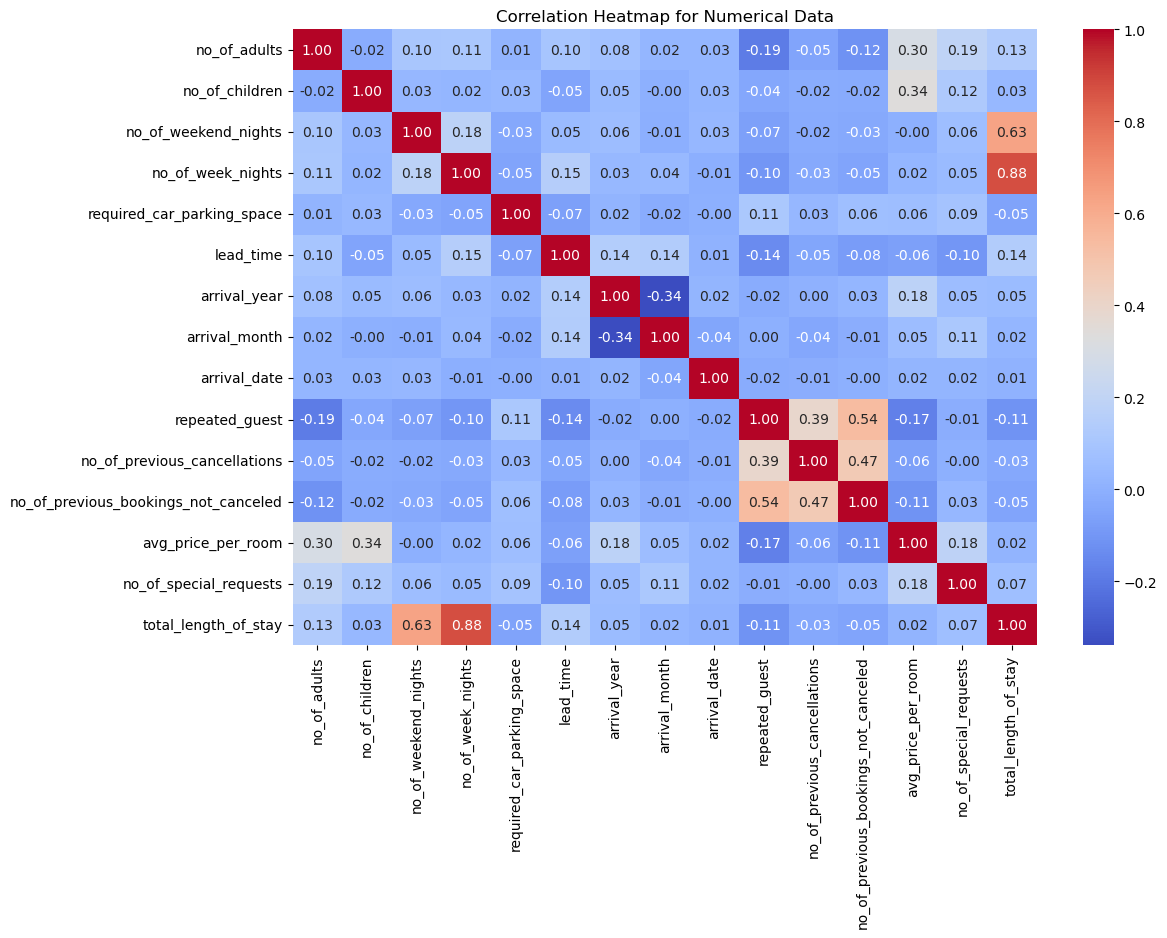

In [11]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix_numerical = numerical_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap for Numerical Data")
plt.show()

## Insights

### How does the number of adults affect the average price per room?

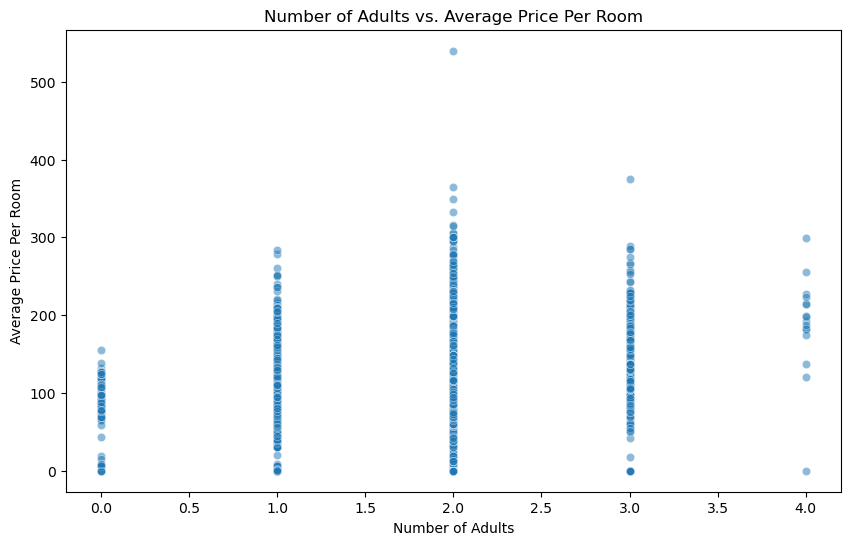

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='no_of_adults', y='avg_price_per_room', alpha=0.5)
plt.title('Number of Adults vs. Average Price Per Room')
plt.xlabel('Number of Adults')
plt.ylabel('Average Price Per Room')
plt.show()

From the visualization, it seems that there is a positive trend; as the number of adults increases, the average price per room tends to increase as well. This could imply that rooms accommodating more adults are priced higher, potentially due to being larger or offering additional amenities.

### What is the distribution of lead times for bookings?

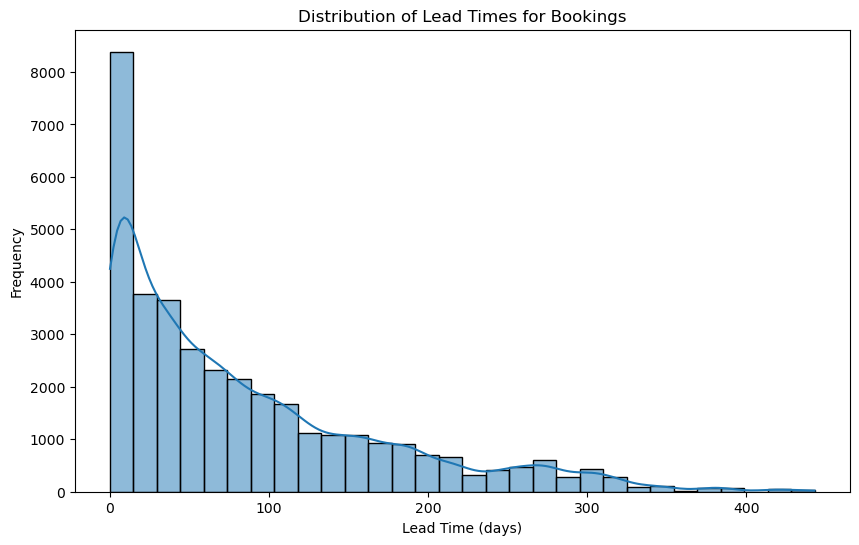

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Times for Bookings')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

Most bookings are made with a short lead time, indicating that customers tend to book their hotel stays closer to the date of arrival. There's a significant drop-off as the lead time increases, with fewer bookings made well in advance.

###  How does the number of special requests vary with the average price per room?

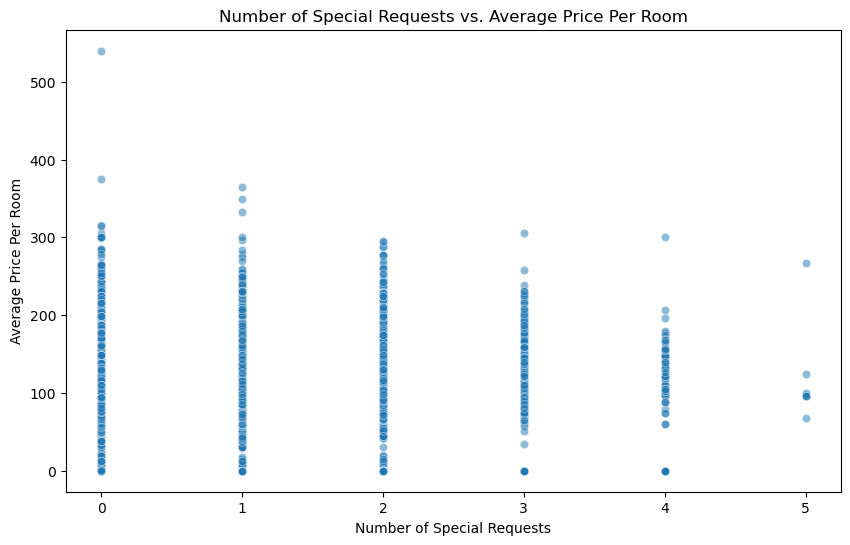

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='no_of_special_requests', y='avg_price_per_room', alpha=0.5)
plt.title('Number of Special Requests vs. Average Price Per Room')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Price Per Room')
plt.show()

The plot suggests that there is a positive correlation; rooms with higher prices tend to have more special requests. This could be because more expensive rooms offer more amenities or services that can be customized, or it might indicate that guests who are paying more are also seeking a more tailored experience.

### Is there a relationship between the number of children and the number of weekend nights booked?

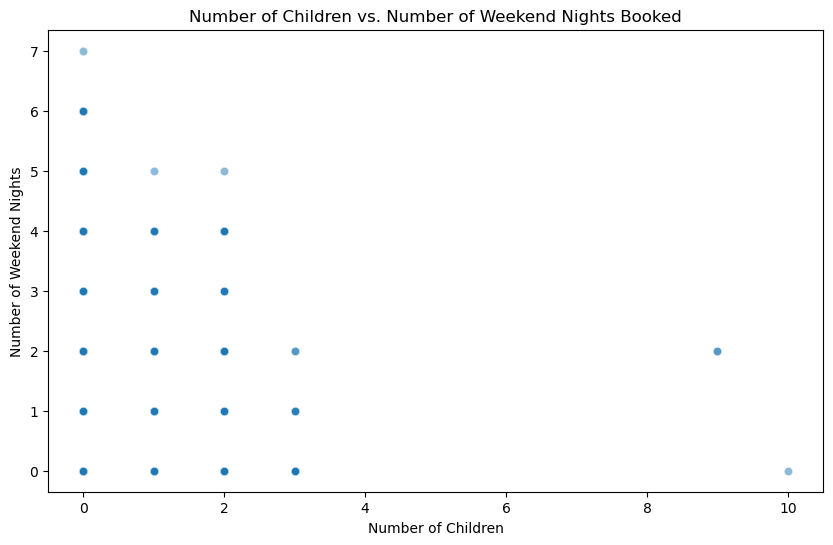

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='no_of_children', y='no_of_weekend_nights', alpha=0.5)
plt.title('Number of Children vs. Number of Weekend Nights Booked')
plt.xlabel('Number of Children')
plt.ylabel('Number of Weekend Nights')
plt.show()

The visualization does not show a strong correlation between the two variables, suggesting that the presence of children in a booking does not necessarily influence the length of stay over the weekend.

### How do the number of previous cancellations relate to the lead time?

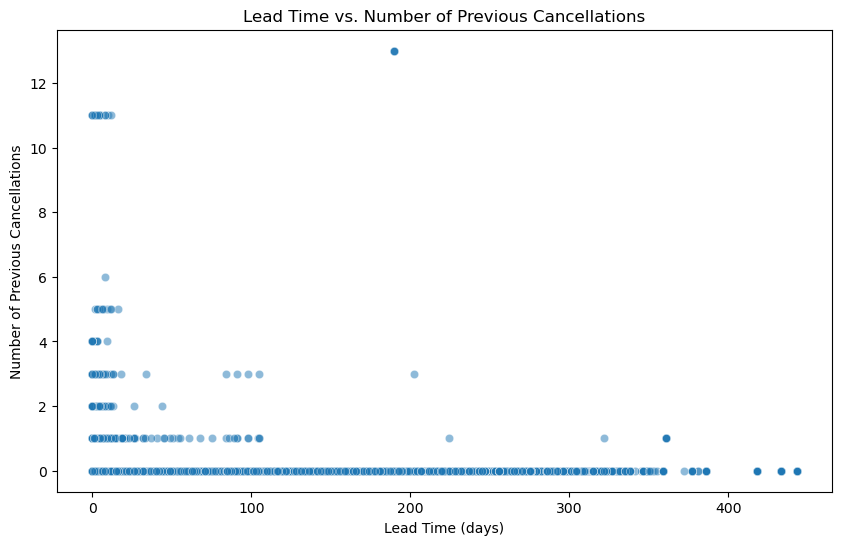

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lead_time', y='no_of_previous_cancellations', alpha=0.5)
plt.title('Lead Time vs. Number of Previous Cancellations')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Previous Cancellations')
plt.show()

The plot shows that most bookings, regardless of lead time, have zero previous cancellations. There are some bookings with a higher number of previous cancellations, but they do not seem to follow a clear trend with respect to lead time. This suggests that the likelihood of previous cancellations does not strongly depend on how far in advance the booking is made.

### What is the distribution of the number of nights (weekend vs. week) stayed?

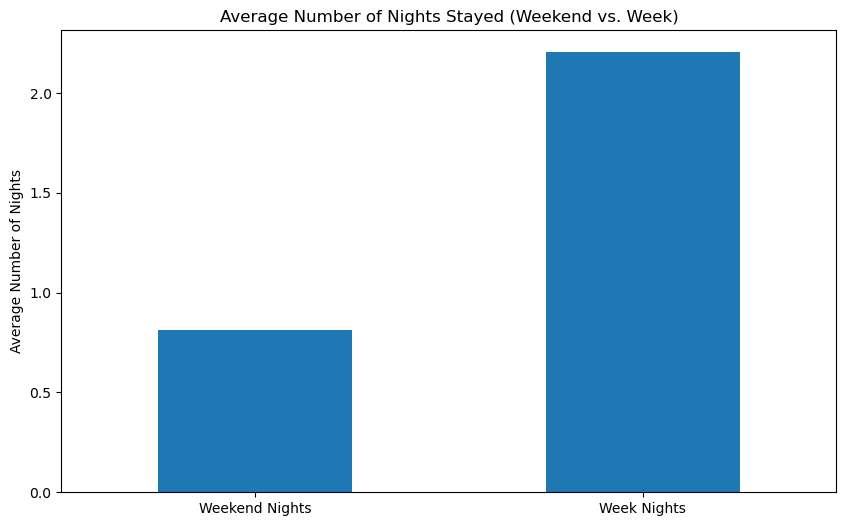

In [17]:
# Preparing data for the bar plot
nights_stayed = df[['no_of_weekend_nights', 'no_of_week_nights']].mean()

# Plotting the bar plot for weekend vs. week nights stayed
plt.figure(figsize=(10, 6))
nights_stayed.plot(kind='bar')
plt.title('Average Number of Nights Stayed (Weekend vs. Week)')
plt.ylabel('Average Number of Nights')
plt.xticks(ticks=range(2), labels=['Weekend Nights', 'Week Nights'], rotation=0)
plt.show()

The plot indicates that, on average, guests stay more nights during the week than over the weekend. This could suggest that the hotel is popular for business travel or events that typically occur during the week, or it may reflect a general trend in guest preferences for longer weekday stays.

### How does the number of previous bookings not canceled relate to repeated guest status?

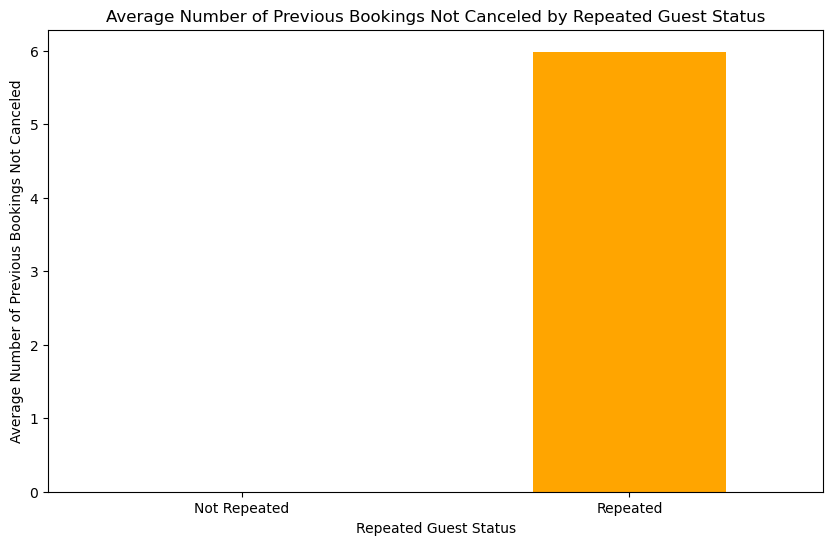

In [18]:
# Calculating the average number of previous bookings not canceled for repeated and non-repeated guests
avg_bookings_not_canceled_by_guest_type = df.groupby('repeated_guest')['no_of_previous_bookings_not_canceled'].mean()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
avg_bookings_not_canceled_by_guest_type.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Previous Bookings Not Canceled by Repeated Guest Status')
plt.xlabel('Repeated Guest Status')
plt.ylabel('Average Number of Previous Bookings Not Canceled')
plt.xticks(ticks=[0, 1], labels=['Not Repeated', 'Repeated'], rotation=0)
plt.show()

It shows that repeated guests have a higher average number of previous bookings not canceled compared to non-repeated guests. This insight suggests that guests who have a history of not canceling their bookings are more likely to be repeat guests, indicating a reliable customer base that the hotel can count on for future bookings.

### How does the requirement for a car parking space relate to the number of adults in the booking?

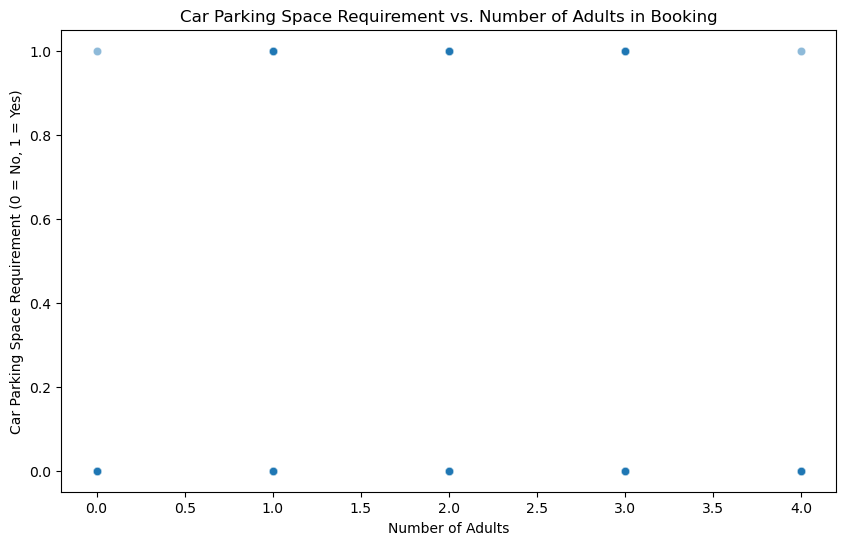

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='no_of_adults', y='required_car_parking_space', alpha=0.5)
plt.title('Car Parking Space Requirement vs. Number of Adults in Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Car Parking Space Requirement (0 = No, 1 = Yes)')
plt.show()

The plot suggests that the requirement for parking does not strongly depend on the number of adults in the booking. Most bookings, regardless of the number of adults, do not require a parking space. This indicates that the hotel either has ample parking or that the majority of guests do not arrive by car. There are a few bookings requiring parking across different group sizes, but there is no clear trend that larger groups need more parking spaces.

### What is the distribution of the total length of stay (weeknights + weekend nights) for bookings?

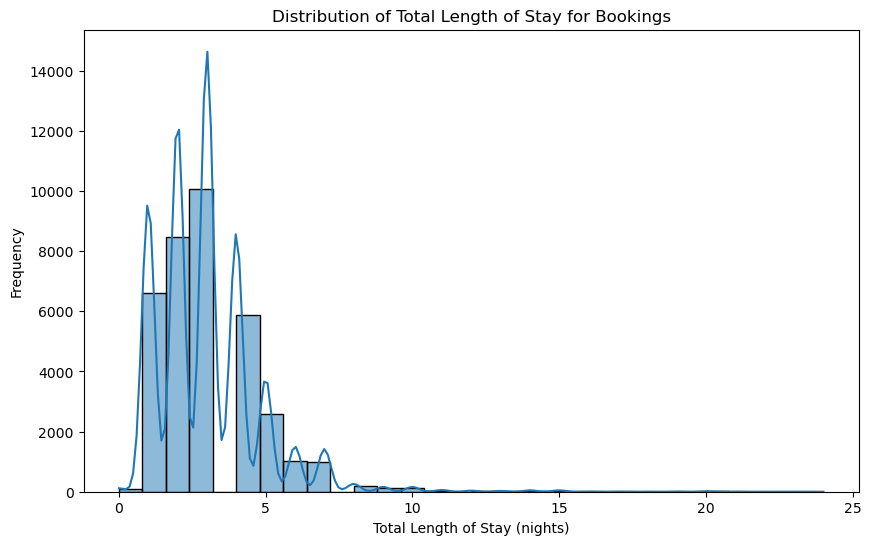

In [20]:
# Creating a new column 'total_length_of_stay' which is the sum of weeknights and weekend nights
df['total_length_of_stay'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

# Plotting the histogram for the total length of stay
plt.figure(figsize=(10, 6))
sns.histplot(df['total_length_of_stay'], bins=30, kde=True)
plt.title('Distribution of Total Length of Stay for Bookings')
plt.xlabel('Total Length of Stay (nights)')
plt.ylabel('Frequency')
plt.show()

The majority of bookings are for short stays of 1 to 4 nights, with a steep drop-off for longer stays. This indicates that the hotel is primarily used for short-term stays.

### How does the lead time for bookings change throughout the year?

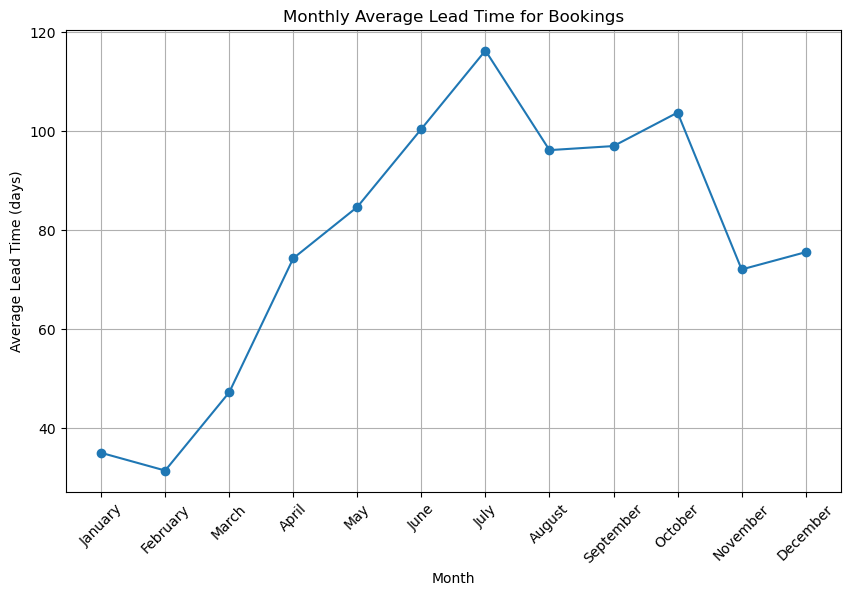

In [25]:
# Grouping by month to calculate the average lead time
monthly_lead_time_trend = df.groupby(df['arrival_month'])['lead_time'].mean()

plt.figure(figsize=(10, 6))
monthly_lead_time_trend.plot(kind='line', marker='o')
plt.title('Monthly Average Lead Time for Bookings')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (days)')
plt.xticks(ticks=range(1, 13), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.grid(True)
plt.show()

There is a noticeable trend where lead times peak around the middle of the year, suggesting that people may plan their summer vacations further in advance. There are dips and rises throughout the year, which could correspond to seasonal travel patterns or specific events that influence when bookings are made.

### How does the average price per room change with the total number of guests (adults + children) in a booking?

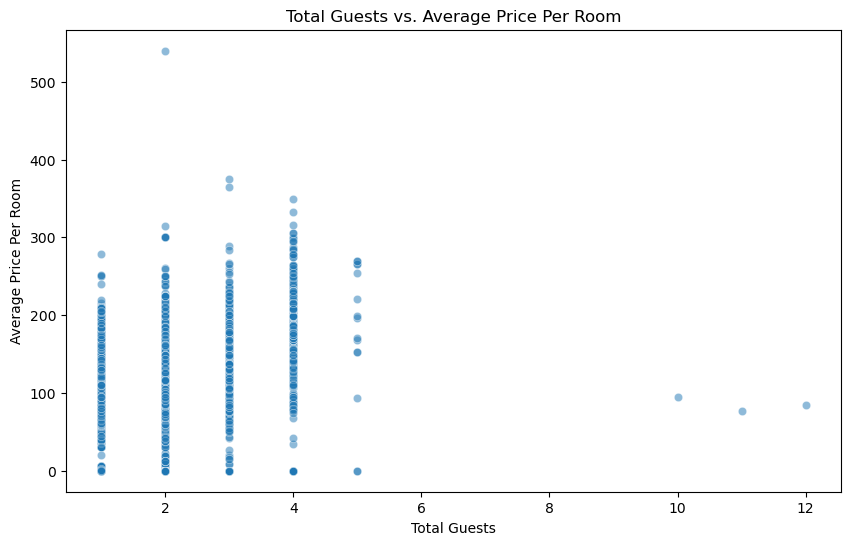

In [26]:
# Creating a new column 'total_guests' which is the sum of adults and children
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_guests', y='avg_price_per_room', alpha=0.5)
plt.title('Total Guests vs. Average Price Per Room')
plt.xlabel('Total Guests')
plt.ylabel('Average Price Per Room')
plt.show()

 The plot indicates that there's not a strong linear correlation between these two variables. While there are some instances of higher room prices with more guests, the relationship is not consistent across the dataset. This suggests that the total number of guests does not have a significant impact on the average room price, or that the hotel has a wide variety of room types accommodating different guest numbers without a proportional increase in price.

## Predictive Modeling 

In [27]:
# Correcting the code to define 'categorical_cols' and to include the conversion of 'booking_status' to numeric

# Convert 'booking_status' to numeric if it's categorical
if df['booking_status'].dtype == 'object':
    df['booking_status'] = df['booking_status'].astype('category').cat.codes

# Now include 'booking_status' in the numeric dataframe
numeric_df = df.select_dtypes(include=[np.number])

# Recompute the correlation
correlation = numeric_df.corr()['booking_status'].sort_values(ascending=False)

# Selecting features with significant correlation
significant_correlation_threshold = 0.05
significant_features = correlation[abs(correlation) > significant_correlation_threshold].index.tolist()
significant_features.remove('booking_status')

# Identifying categorical columns (excluding 'Booking_ID' which is likely a unique identifier)
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Booking_ID')

# Handling categorical data: Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Including new columns from one-hot encoding that correspond to significant features
final_features = [col for col in df_encoded.columns if col in significant_features or '_'.join(col.split('_')[:-1]) in significant_features]

# Preparing the final dataset for modeling
df_final = df_encoded[final_features + ['booking_status']]

# Display the first few rows of the final dataset
df_final.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_length_of_stay,total_guests,booking_status
0,2,1,2,0,224,2017,0,0,65.00,0,3,2,1
1,2,2,3,0,5,2018,0,0,106.68,1,5,2,1
2,1,2,1,0,1,2018,0,0,60.00,0,3,1,0
3,2,0,2,0,211,2018,0,0,100.00,0,2,2,0
4,2,1,1,0,48,2018,0,0,94.50,0,2,2,0


Conversion of booking_status: The booking_status column was converted to numeric using label encoding if it was initially categorical.

Correlation Analysis: Selected numeric columns including the newly numeric booking_status. Computed the correlation of these numeric columns with booking_status.

Feature Selection: Selected features with a significant correlation (threshold > 0.05) with booking_status. Removed booking_status from the feature list as it's the target variable.

Handling Categorical Data: Identified categorical columns (excluding 'Booking_ID'). Converted these categorical columns to numerical format using one-hot encoding.

Final Dataset Preparation: Included new columns resulting from one-hot encoding corresponding to the significant features.
The final dataset df_final now contains the selected features and the target variable booking_status.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Standardizing the significant numeric columns
scaler = StandardScaler()
df_encoded[significant_features] = scaler.fit_transform(df_encoded[significant_features])

# Normalizing the target variable 'booking_status' using MinMaxScaler
target_scaler = MinMaxScaler()
df_encoded['booking_status'] = target_scaler.fit_transform(df_encoded[['booking_status']])

# Display the first few rows of the processed dataset
df_encoded.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_length_of_stay,total_guests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,0.298893,0,0.217401,-0.144803,-0.178819,1.614896,-2.137469,10,2,-0.16221,0,-0.087456,-1.095033,-0.78814,1.0,-0.008412,0.076515,False,False,False,False,False,False,False,False,False,False,False,True,False
1,INN00002,0.298893,0,1.365993,0.563972,-0.178819,-0.933701,0.467843,11,6,-0.16221,0,-0.087456,0.092806,0.48376,1.0,1.111414,0.076515,False,False,True,False,False,False,False,False,False,False,False,False,True
2,INN00003,-1.628975,0,1.365993,-0.853578,-0.178819,-0.980250,0.467843,2,28,-0.16221,0,-0.087456,-1.237528,-0.78814,0.0,-0.008412,-1.461195,False,False,False,False,False,False,False,False,False,False,False,False,True
3,INN00004,0.298893,0,-0.931190,-0.144803,-0.178819,1.463610,0.467843,5,20,-0.16221,0,-0.087456,-0.097567,-0.78814,0.0,-0.568325,0.076515,False,False,False,False,False,False,False,False,False,False,False,False,True
4,INN00005,0.298893,0,0.217401,-0.853578,-0.178819,-0.433291,0.467843,4,11,-0.16221,0,-0.087456,-0.254312,-0.78814,0.0,-0.568325,0.076515,False,False,True,False,False,False,False,False,False,False,False,False,True


### KNN

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Preparing data for the KNN model
X = df_encoded[significant_features]
y = df_encoded['booking_status']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8392906367729487

In [47]:
from sklearn.metrics import classification_report, mean_squared_error
# Splitting the dataset into training and test sets
X = df_encoded[significant_features]
y = df_encoded['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Redefining the evaluate_knn function with the necessary imports
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return accuracy, mse, report

# # Applying KNN with Euclidean and Manhattan distance on the hotel reservation dataset
euclidean_accuracy, euclidean_mse, euclidean_report = evaluate_knn(5, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)
manhattan_accuracy, manhattan_mse, manhattan_report = evaluate_knn(5, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

# Formatting and printing the results
print("Euclidean Distance KNN")
print("----------------------")
print(f"Accuracy: {euclidean_accuracy}")
print(f"Mean Squared Error: {euclidean_mse}")
print("Classification Report:")
print(euclidean_report)
print("\nManhattan Distance KNN")
print("----------------------")
print(f"Accuracy: {manhattan_accuracy}")
print(f"Mean Squared Error: {manhattan_mse}")
print("Classification Report:")
print(manhattan_report)

Euclidean Distance KNN
----------------------
Accuracy: 0.8391068639161996
Mean Squared Error: 0.16089313608380043
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74      3607
         1.0       0.86      0.91      0.88      7276

    accuracy                           0.84     10883
   macro avg       0.82      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883


Manhattan Distance KNN
----------------------
Accuracy: 0.8369015896352109
Mean Squared Error: 0.16309841036478911
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74      3607
         1.0       0.86      0.91      0.88      7276

    accuracy                           0.84     10883
   macro avg       0.82      0.80      0.81     10883
weighted avg       0.83      0.84      0.83     10883



### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Since 'output' column is not in our dataset, we'll use 'booking_status' as the target variable
important_features = significant_features + ['booking_status']
df_selected_features = df_encoded[important_features]

# Splitting the data
X = df_selected_features.drop('booking_status', axis=1)
y = df_selected_features['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Model with Gini impurity
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

# Training the Decision Tree Model with Information Gain (Entropy)
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)

# Making predictions and evaluating the Gini model
y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Making predictions and evaluating the Entropy model
y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Print out the accuracies for both models
accuracy_gini, accuracy_entropy

(0.842315644383184, 0.8457615437629221)

## PCA

In [34]:
from sklearn.decomposition import PCA

# Performing Principal Component Analysis (PCA)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [45]:
# Splitting the data
X = df_encoded[significant_features]
y = df_encoded['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Verify the number of samples match
print("Number of samples in X_train_pca:", X_train_pca.shape[0])
print("Number of samples in y_train:", y_train.shape[0])
print("Number of samples in X_test_pca:", X_test_pca.shape[0])
print("Number of samples in y_test:", y_test.shape[0])


# Applying KNN with Euclidean distance on the PCA-transformed data
euclidean_accuracy_pca, euclidean_mse_pca, euclidean_report_pca = evaluate_knn(5, 'euclidean', X_train_pca, y_train, X_test_pca, y_test)

# Printing the results for Euclidean distance
print("\nKNN with Euclidean Distance on PCA-transformed data:")
print("Accuracy:", euclidean_accuracy_pca)
print("Mean Squared Error:", euclidean_mse_pca)
print("Classification Report:\n", euclidean_report_pca)


Number of samples in X_train_pca: 25392
Number of samples in y_train: 25392
Number of samples in X_test_pca: 10883
Number of samples in y_test: 10883

KNN with Euclidean Distance on PCA-transformed data:
Accuracy: 0.8389230910594505
Mean Squared Error: 0.1610769089405495
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.70      0.74      3607
         1.0       0.86      0.91      0.88      7276

    accuracy                           0.84     10883
   macro avg       0.82      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



In [36]:
# Training a shallower Decision Tree with Gini impurity on the PCA-transformed data
model_gini_pca_shallow = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model_gini_pca_shallow.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [37]:
# Training a shallower Decision Tree with Entropy on the PCA-transformed data
model_entropy_pca_shallow = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model_entropy_pca_shallow.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [38]:
# Evaluating the shallower Decision Tree models trained on the PCA-transformed data

# Evaluating the model with Gini impurity
y_pred_gini_pca_shallow = model_gini_pca_shallow.predict(X_test_pca)
accuracy_gini_pca_shallow = accuracy_score(y_test, y_pred_gini_pca_shallow)
mse_gini_pca_shallow = mean_squared_error(y_test, y_pred_gini_pca_shallow)

# Evaluating the model with Entropy
y_pred_entropy_pca_shallow = model_entropy_pca_shallow.predict(X_test_pca)
accuracy_entropy_pca_shallow = accuracy_score(y_test, y_pred_entropy_pca_shallow)
mse_entropy_pca_shallow = mean_squared_error(y_test, y_pred_entropy_pca_shallow)

# Formatting and printing the results
accuracy_gini_pca_shallow, mse_gini_pca_shallow, accuracy_entropy_pca_shallow, mse_entropy_pca_shallow


(0.792979876872186, 0.207020123127814, 0.79123403473307, 0.2087659652669301)

## SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE only to the target variable 'booking_status'
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verifying the balance of the classes after applying SMOTE
class_balance_smote = pd.Series(y_train_smote).value_counts()
class_balance_smote

booking_status
0.0    17114
1.0    17114
Name: count, dtype: int64

## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

knn_smote = KNeighborsClassifier(n_neighbors=1)
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test)
accuracy_knn_smote = accuracy_score(y_test, y_pred_knn_smote)
mse_knn_smote = mean_squared_error(y_test, y_pred_knn_smote)

print("KNN Model Accuracy:", accuracy_knn_smote)
print("KNN Model MSE:", mse_knn_smote)

KNN Model Accuracy: 0.8320316089313609
KNN Model MSE: 0.16796839106863917


## DECISION TREE 

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Gini
dt_gini_smote = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini_smote.fit(X_train_smote, y_train_smote)
y_pred_dt_gini_smote = dt_gini_smote.predict(X_test)
accuracy_dt_gini_smote = accuracy_score(y_test, y_pred_dt_gini_smote)
mse_dt_gini_smote = mean_squared_error(y_test, y_pred_dt_gini_smote)

# Entropy
dt_entropy_smote = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy_smote.fit(X_train_smote, y_train_smote)
y_pred_dt_entropy_smote = dt_entropy_smote.predict(X_test)
accuracy_dt_entropy_smote = accuracy_score(y_test, y_pred_dt_entropy_smote)
mse_dt_entropy_smote = mean_squared_error(y_test, y_pred_dt_entropy_smote)

print("Decision Tree (Gini) Accuracy:", accuracy_dt_gini_smote)
print("Decision Tree (Gini) MSE:", mse_dt_gini_smote)
print("Decision Tree (Entropy) Accuracy:", accuracy_dt_entropy_smote)
print("Decision Tree (Entropy) MSE:", mse_dt_entropy_smote)

Decision Tree (Gini) Accuracy: 0.8318478360746118
Decision Tree (Gini) MSE: 0.16815216392538823
Decision Tree (Entropy) Accuracy: 0.837269135348709
Decision Tree (Entropy) MSE: 0.162730864651291
